# Analyse des données d'expérience

Expérience: J7 Energie Solaire, expérience 1

Date: 2023-10-01

In [21]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
import tikzplotlib as tikz
from options import *

In [23]:
rawdata = np.loadtxt("../data/Igamma(d).csv", dtype=float, delimiter=",", skiprows=1)
PgammaS = np.loadtxt("../data/Pgamma(d).csv", dtype=float, delimiter=",", skiprows=1)
Pgamma = PgammaS * 0.01

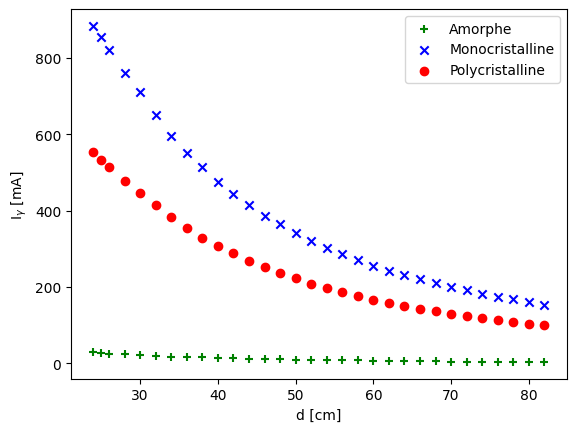

In [30]:
plt.scatter(rawdata[:,0], rawdata[:,1], color=colors["A"], marker="+", label="Amorphe")
plt.scatter(rawdata[:,0], rawdata[:,2], color=colors["M"], marker="x", label="Monocristalline")
plt.scatter(rawdata[:,0], rawdata[:,3], color=colors["P"], label="Polycristalline")
plt.xlabel("d [cm]")
plt.ylabel("I$_\gamma$ [mA]")
# plt.title("Courant photovoltaïque pour différentes cellules")
plt.legend()
tikz.save("../plots/Igamma(d),AMP.tikz")

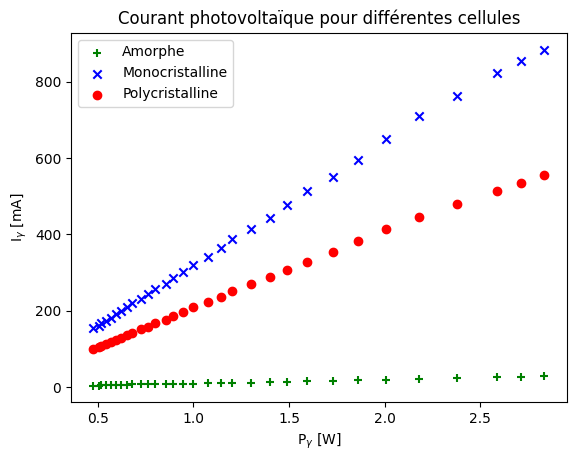

In [25]:
plt.scatter(Pgamma[:,1], rawdata[:,1], color=colors["A"], marker="+", label="Amorphe")
plt.scatter(Pgamma[:,1], rawdata[:,2], color=colors["M"], marker="x", label="Monocristalline")
plt.scatter(Pgamma[:,1], rawdata[:,3], color=colors["P"], label="Polycristalline")
plt.xlabel("P$_\gamma$ [W]")
plt.ylabel("I$_\gamma$ [mA]")
plt.legend()

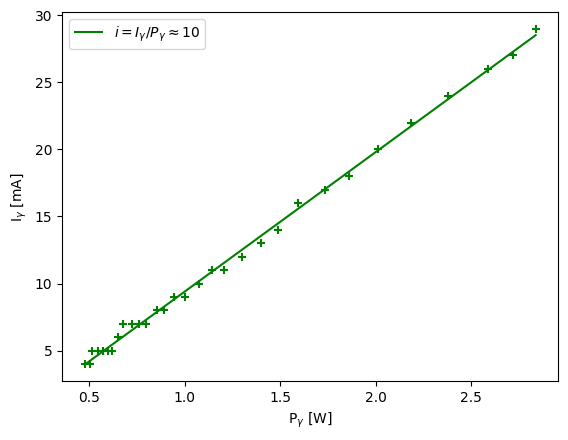

In [26]:
coefs_A = np.polyfit(Pgamma[:,1], rawdata[:,1], 1)
fit_A = np.poly1d(coefs_A)
plt.plot(Pgamma[:,1], fit_A(Pgamma[:,1]), color=colors["A"], label=f"$i = I_\gamma/P_\gamma \\approx {coefs_A[0]:.0f}$")

plt.scatter(Pgamma[:,1], rawdata[:,1], color=colors["A"], marker="+")
plt.xlabel("P$_\gamma$ [W]")
plt.ylabel("I$_\gamma$ [mA]")
plt.legend()

tikz.save("../plots/i(Pgamma),A.tikz")

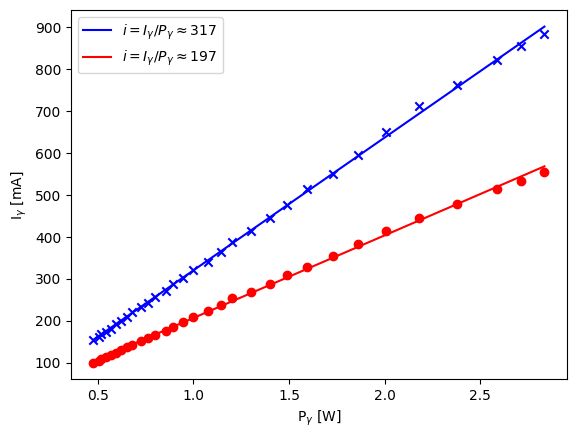

In [29]:
# Mono
coefs_M = np.polyfit(Pgamma[:,1], rawdata[:,2], 1)
fit_M = np.poly1d(coefs_M)
plt.plot(Pgamma[:,1], fit_M(Pgamma[:,1]), color=colors["M"], label=f"$i = I_\gamma/P_\gamma \\approx {coefs_M[0]:.0f}$")

plt.scatter(Pgamma[:,1], rawdata[:,2], color=colors["M"], marker="x")

# Poly
coefs_P = np.polyfit(Pgamma[:,1], rawdata[:,3], 1)
fit_P = np.poly1d(coefs_P)
plt.plot(Pgamma[:,1], fit_P(Pgamma[:,1]), color=colors["P"], label=f"$i = I_\gamma/P_\gamma \\approx {coefs_P[0]:.0f}$")

plt.scatter(Pgamma[:,1], rawdata[:,3], color=colors["P"])

plt.xlabel("P$_\gamma$ [W]")
plt.ylabel("I$_\gamma$ [mA]")
plt.legend()
tikz.save("../plots/i(Pgamma),MP.tikz")